In [1]:
!pip install pyspark==3.0.1 py4j==0.10.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 23.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612224 sha256=a56fcd4e41534b9398b763b788402f70da0bf179010d2ec493e7f888d1f5c47b
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

### Завдання 1-2

In [6]:
path = "/content/bestsellers with categories.csv"
df = spark.read.csv(path, header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+-------

### Завдання 3

In [7]:
df.dtypes

[('Name', 'string'),
 ('Author', 'string'),
 ('User Rating', 'double'),
 ('Reviews', 'int'),
 ('Price', 'int'),
 ('Year', 'int'),
 ('Genre', 'string')]

### Завдання 4

In [8]:
df.head(5)

[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')]

### Завдання 5

In [9]:
df.first()

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')

### Завдання 6

In [10]:
df.describe().show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                null|            null|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

### Завдання 7

In [11]:
df.columns

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

### Завдання 8


In [12]:
df.count()

550

### Завдання 9

In [13]:
dict_missing = {col:df.filter(df[col].isNull()).count() for col in df.columns}
dict_missing

{'Name': 0,
 'Author': 0,
 'User Rating': 0,
 'Reviews': 0,
 'Price': 0,
 'Year': 0,
 'Genre': 0}

### Завдання 10

Пропущених даних немає в датасеті

Книги, які збережені в датасеті

In [17]:
books = [row.Name for row in df.select("Name").distinct().collect()]
books[0:5]

['The Legend of Zelda: Hyrule Historia',
 'The Paris Wife: A Novel',
 'The Wonderful Things You Will Be',
 'Eat This, Not That! Thousands of Simple Food Swaps that Can Save You 10, 20, 30 Pounds--or More!',
 'The Immortal Life of Henrietta Lacks']

In [18]:
print("Кількість книг ", len(books))

Кількість книг  351


### Завдання 11-12

In [19]:
df = df.toDF('name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre')
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
only showing top 5 rows



### Завдання 13

In [26]:
from pyspark.sql.functions import desc

# Assuming df is your DataFrame
author_with_max_rating = df.orderBy(desc("user_rating")).first()

print("Автор з найвищим рейтингом:", author_with_max_rating["author"],
      "\nРейтинг:", author_with_max_rating["user_rating"])

Автор з найвищим рейтингом: Bill Martin Jr. 
Рейтинг: 4.9


### Завдання 14

In [24]:
from pyspark.sql.functions import asc
author_with_min_rating = df.orderBy(asc("user_rating")).first()
print("Автор з найнижчим рейтингом:", author_with_min_rating["author"],
      "\nРейтинг:", author_with_min_rating["user_rating"])

Автор з найнижчим рейтингом: J.K. Rowling 
Рейтинг: 3.3


### Завдання 15

In [25]:
author_with_max_reviews = df.orderBy(desc("reviews")).first()
print("Автор з найбільшою кількістю рецензій:", author_with_max_reviews["author"],
      "\nКількість рецензій:", author_with_max_reviews["reviews"])

Автор з найбільшою кількістю рецензій: Delia Owens 
Кількість рецензій: 87841


### Завдання 16

In [29]:
topbooks = df.orderBy(desc("user_rating")).limit(10).select("name", "user_rating")
topbooks_pd = topbooks.toPandas()
topbooks_pd

,name,user_rating
0,Dog Man and Cat Kid: From the Creator of Capta...,4.9
1,Hamilton: The Revolution,4.9
2,Dog Man: A Tale of Two Kitties: From the Creat...,4.9
3,"Brown Bear, Brown Bear, What Do You See?",4.9
4,Dog Man: Brawl of the Wild: From the Creator o...,4.9
5,Dog Man: For Whom the Ball Rolls: From the Cre...,4.9
6,Dog Man: Lord of the Fleas: From the Creator o...,4.9
7,"Brown Bear, Brown Bear, What Do You See?",4.9
8,"Goodnight, Goodnight Construction Site (Hardco...",4.9
9,Dog Man: Fetch-22: From the Creator of Captain...,4.9


In [30]:
import matplotlib.pyplot as plt

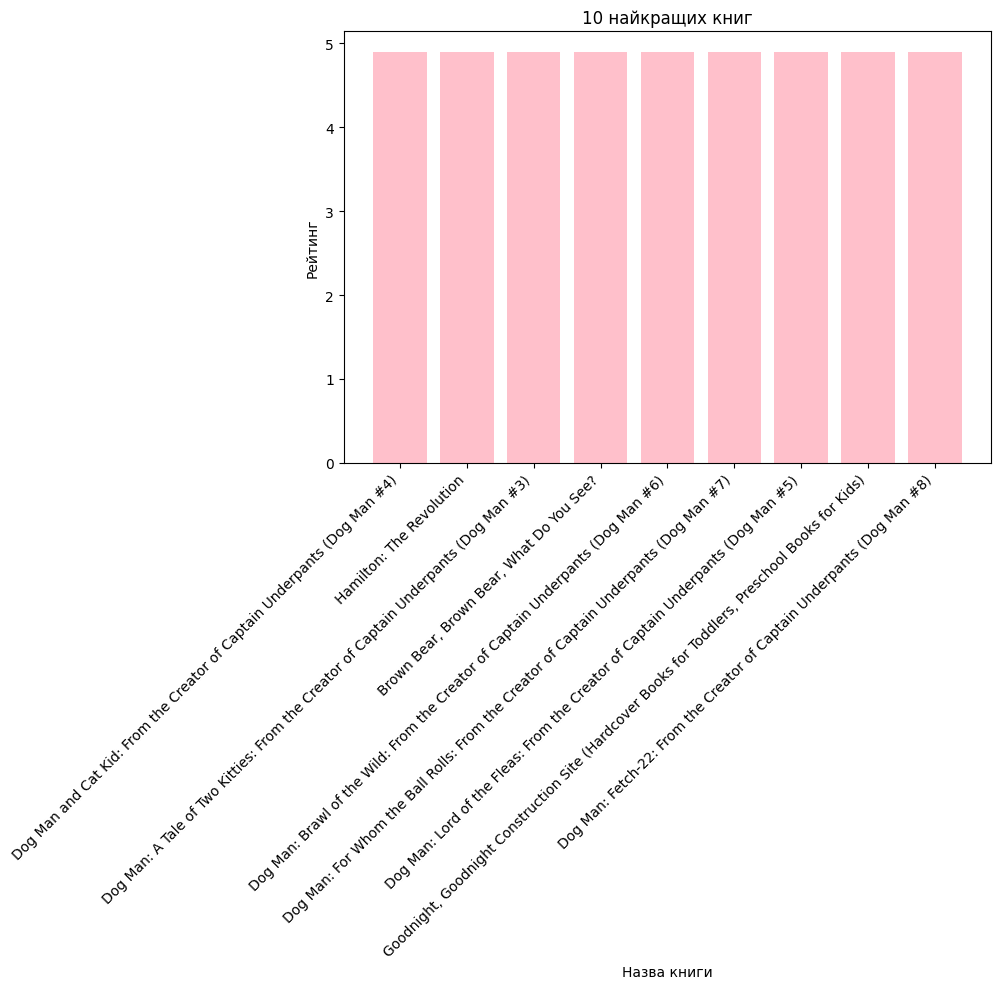

In [32]:
plt.figure(figsize=(10, 10))
plt.bar(topbooks_pd["name"], topbooks_pd["user_rating"], color='pink')
plt.xlabel('Назва книги')
plt.ylabel('Рейтинг')
plt.title('10 найкращих книг')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Завдання 17

In [35]:
import seaborn as sns

In [36]:
selected_data = df.select(['user_rating', 'reviews', 'price'])

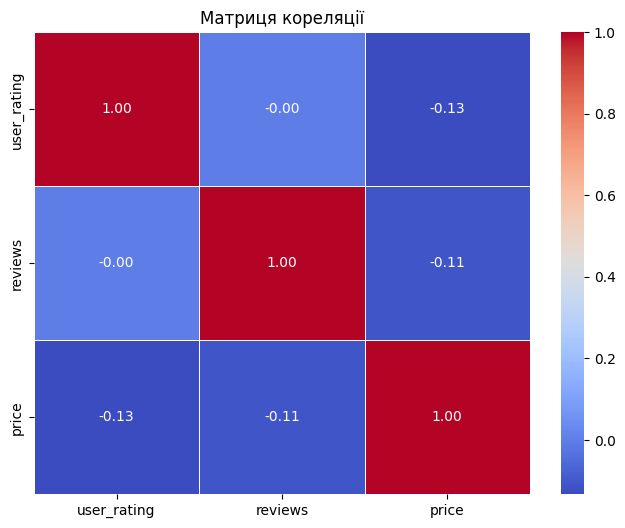

In [37]:
correlation_matrix_pd = selected_data.toPandas()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pd.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матриця кореляції')
plt.show()
